# Section 1: Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import gmaps
import scipy.stats as sts
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets

#Google developer API key {Carlos}
from config import gkey

%matplotlib inline

# Section 2: Load Crime Dataset and Visualizations

In [2]:
#Load CSV containing crime data for Atlanta in 2016
path = os.path.join('..','Resources','ATLCrime2016.csv')
crime = pd.read_csv(path)
crime.head()

,crime,number,date,location,beat,neighborhood,npu,lat,long,Month,Day,Year
0,HOMICIDE,163051391092,10/31/2016,1205 METROPOLITAN AVE SE,612,East Atlanta,W,33.74173,-84.34749,10,31,2016
1,AUTO THEFT,163030548,10/31/2016,180 PONCE DE LEON AVE NE,505,Midtown,E,33.77285,-84.38149,10,31,2016
2,LARCENY-FROM VEHICLE,163041611,10/31/2016,1783 JOHNSON RD NW,110,Rockdale,G,33.78547,-84.44593,10,31,2016
3,LARCENY-FROM VEHICLE,163050183,10/31/2016,1000 NORTHSIDE DR NW,501,Home Park,E,33.78196,-84.40835,10,31,2016
4,AUTO THEFT,163050218,10/31/2016,2264 COUNTRY CLUB DR SW,409,Southwest,R,33.69384,-84.49398,10,31,2016


In [3]:
#Gmap pf Crime Type in 2016

#Configure Gmaps
gmaps.configure(api_key=gkey)

#Load parameters
coordg1 = crime.loc[(crime['crime']=='LARCENY-FROM VEHICLE') & (crime['Month']==6)][['lat','long']]
coordg2 = crime.loc[(crime['crime']=='BURGLARY-RESIDENCE') & (crime['Month']==6)][['lat','long']]
coordg3 = crime.loc[(crime['crime']=='ROBBERY-PEDESTRIAN') & (crime['Month']==6)][['lat','long']]
coordg4 = crime.loc[(crime['crime']=='RAPE') & (crime['Month']==6)][['lat','long']]
coordg5 = crime.loc[(crime['crime']=='HOMICIDE') & (crime['Month']==6)][['lat','long']]

#Define Figure Layout
figure_layout = {
    
    'width':'1000px',
    'height':'600px',
    'border':'1px solid black',
    'padding':'1px',
    'margin':'0 auto 0 auto'
}

#Define Symbol Layers
f = gmaps.figure(layout=figure_layout, center=(33.7490, -84.386330),zoom_level=13, map_type='TERRAIN')
f.add_layer(gmaps.symbol_layer(coordg1, fill_color=(244, 27, 63, 0.8), stroke_color=(244, 27, 63, 0.8), scale=2))
f.add_layer(gmaps.symbol_layer(coordg2, fill_color=(38, 156, 98, 0.8), stroke_color=(38, 156, 98, 0.8), scale=2))
f.add_layer(gmaps.symbol_layer(coordg3, fill_color=(242, 202, 33, 0.8), stroke_color=(242, 202, 33, 0.8), scale=2))
f.add_layer(gmaps.symbol_layer(coordg4, fill_color=(21, 104, 156, 0.8), stroke_color=(21, 104, 156, 0.8), scale=2))
f.add_layer(gmaps.symbol_layer(coordg5, fill_color=(153, 148, 194, 0.8), stroke_color=(153, 148, 194, 0.8), scale=2))


#Add Legends using widgets HBox
legend_template = '<span style="color: {color}; font-size: 2em; vertical-align: bottom;">&#9679;</span> {name}'
legend = widgets.HBox(
    [widgets.HTML(legend_template.format(color='red', name='LARCENY-FROM VEHICLE')),
    widgets.HTML(legend_template.format(color='green', name='BURGLARY-RESIDENCE')),
    widgets.HTML(legend_template.format(color='yellow', name='ROBBERY-PEDESTRIAN')),
    widgets.HTML(legend_template.format(color='blue', name='RAPE')),
    widgets.HTML(legend_template.format(color='purple', name='HOMICIDE'))],
    layout=widgets.Layout(width='100%', justify_content='space-between')
    )

#Draw map and legends layers using VBox
widgets.VBox([f, legend]) 


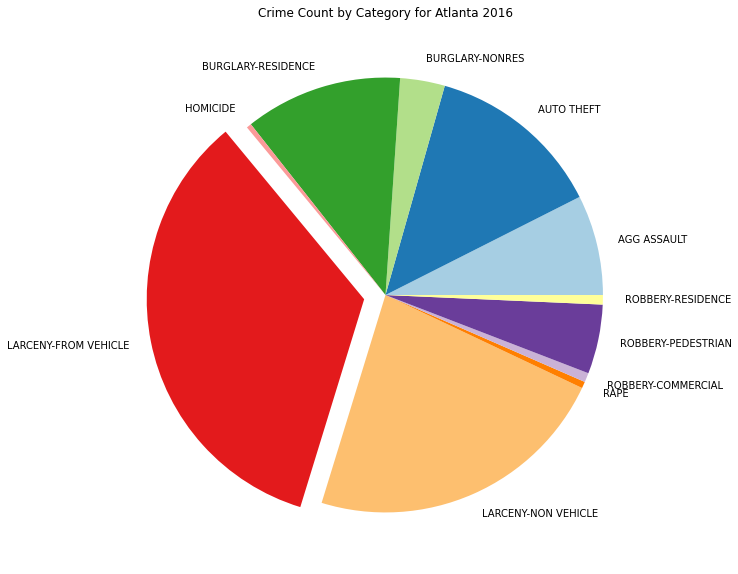

In [4]:
#Pie chart of type of crime
data = crime.groupby('crime').count().iloc[:,0]
labels=data.index

#Create pie chart
ax=data.plot.pie(figsize=(10,10), title = 'Crime Count by Category for Atlanta 2016',
                 labels=labels, colors = plt.get_cmap('Paired').colors,
                explode = (0,0,0,0,0,0.1,0,0,0,0,0))


#Remove y label to make ir cleaner
ax.set_ylabel('')

#Show the plot
plt.show()

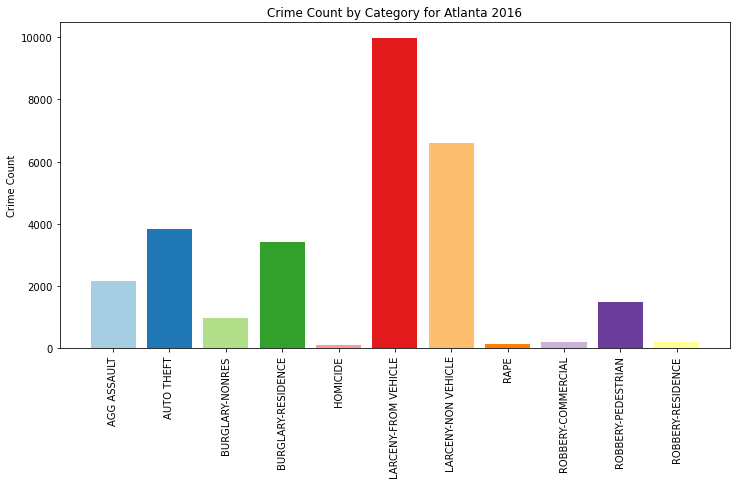

In [5]:
#Bar chart for type of crime
data = crime.groupby('crime').count().iloc[:,0].values
labels=crime.groupby('crime').count().iloc[:,0].index
x_axis = np.arange(len(data))

#Create bar chart
plt.figure(figsize=(12,6))
plt.bar(x_axis,data, color= plt.get_cmap('Paired').colors)
ticks= [v for v in x_axis]
plt.xticks(ticks,labels, rotation=90)
plt.ylabel('Crime Count')
plt.title('Crime Count by Category for Atlanta 2016')
plt.show()

# Section 3: Visualizations for Crime Types

In [15]:
# Load individual groups

#1. LARCENY-FROM VEHICLE
path = os.path.join('..','Resources','larceny2.csv')
g1w = pd.read_csv(path)
g1w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

#2. BURGLARY-RESIDENCE
path = os.path.join('..','Resources','burglary2.csv')
g2w = pd.read_csv(path)
g2w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

#3. ROBBERY-PEDESTRIAN
path = os.path.join('..','Resources','robbery2.csv')
g3w = pd.read_csv(path)
g3w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

#4. RAPE
path = os.path.join('..','Resources','rape2.csv')
g4w = pd.read_csv(path)
g4w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

#5. HOMICIDE
path = os.path.join('..','Resources','homicide2.csv')
g5w = pd.read_csv(path)
g5w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

In [16]:
g1w

,Month,Day,Crime Count,Avg_Temp,Humidity,Precip,Wind_Speed,Conditions,Ice Cream Shop
0,1,1,21,42.8,67.84,0.00,13.3,Partially cloudy,77
1,1,2,28,40.0,58.12,0.00,13.8,Partially cloudy,93
2,1,3,24,42.2,54.95,0.00,12.7,Partially cloudy,82
3,1,4,29,38.5,53.05,0.00,16.7,Clear,98
4,1,5,27,34.6,44.61,0.00,12.6,Clear,90
...,...,...,...,...,...,...,...,...,...
361,12,27,22,62.2,86.62,0.01,12.6,"Rain, Overcast",73
362,12,28,30,55.9,67.24,0.00,7.5,Partially cloudy,101
363,12,29,26,56.4,54.45,0.68,26.0,"Rain, Partially cloudy",81
364,12,30,23,42.5,36.00,0.00,16.1,Clear,75


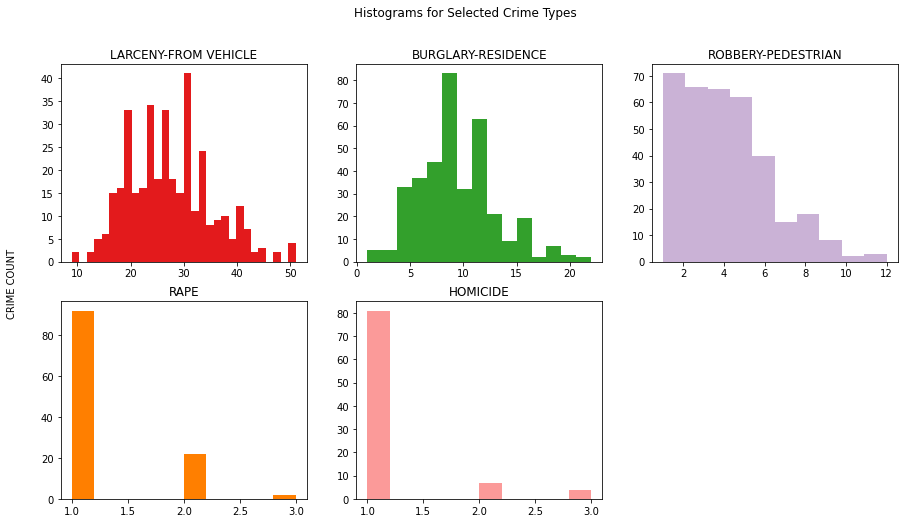

In [17]:
#Distribution plots for each type of crime
fig,ax = plt.subplots(2,3, figsize=(15,8))
fig.suptitle('Histograms for Selected Crime Types')

#1. LARCENY-FROM VEHICLE
ax[0][0].hist(g1w['Crime Count'],bins=30, color= plt.get_cmap('Paired').colors[5])
ax[0][0].title.set_text('LARCENY-FROM VEHICLE')

#2. BURGLARY-RESIDENCE
ax[0][1].hist(g2w['Crime Count'],bins=15, color= plt.get_cmap('Paired').colors[3])
ax[0][1].title.set_text('BURGLARY-RESIDENCE')

#3. ROBBERY-PEDESTRIAN
ax[0][2].hist(g3w['Crime Count'],bins=10, color= plt.get_cmap('Paired').colors[8])
ax[0][2].title.set_text('ROBBERY-PEDESTRIAN')

#4. RAPE
ax[1][0].hist(g4w['Crime Count'], color= plt.get_cmap('Paired').colors[7])
ax[1][0].title.set_text('RAPE')

#5. HOMICIDE
ax[1][1].hist(g5w['Crime Count'], color= plt.get_cmap('Paired').colors[4])
ax[1][1].title.set_text('HOMICIDE')


ax[1][2].set_visible(False)
fig.text(0.08, 0.5, 'CRIME COUNT', ha='center', va='center', rotation ='vertical')
plt.show()

# Section 4: Weather Visualizations

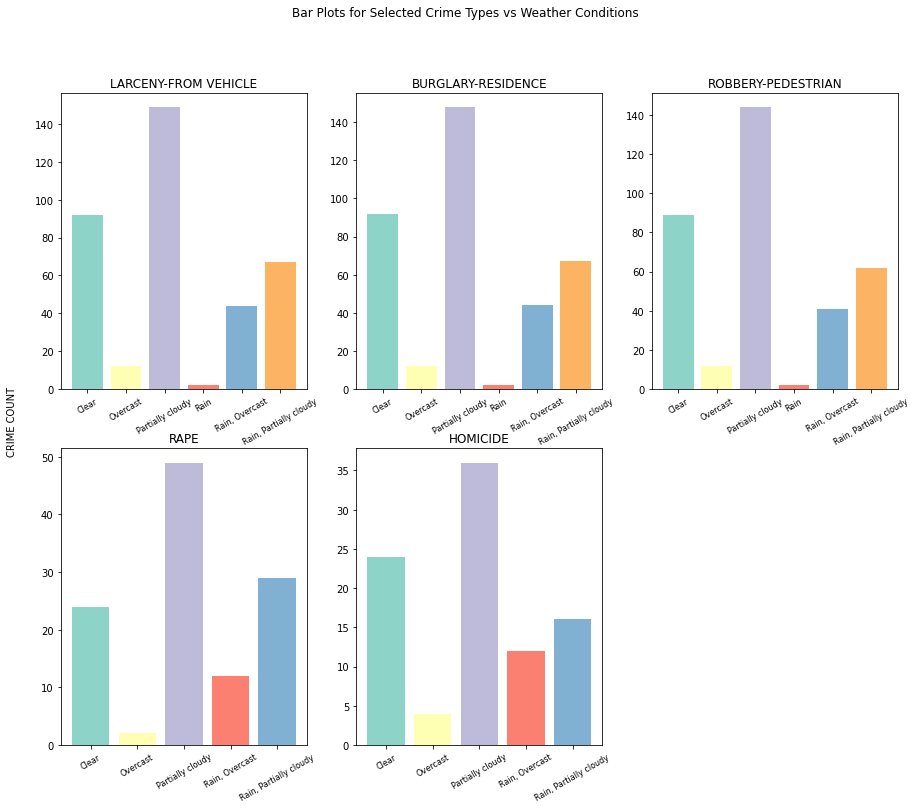

In [18]:
#Bar plots for each type of crime and weather conditions
fig,ax = plt.subplots(2,3, figsize=(15,12))
fig.suptitle('Bar Plots for Selected Crime Types vs Weather Conditions')

#1. LARCENY-FROM VEHICLE
data = g1w.groupby('Conditions').count().iloc[:,0].values
labels=g1w.groupby('Conditions').count().iloc[:,0].index
x_axis = np.arange(len(data))
ax[0][0].title.set_text('LARCENY-FROM VEHICLE')
ax[0][0].bar(x_axis,data, color= plt.get_cmap('Set3').colors)
ticks= [v for v in x_axis]
ax[0][0].set_xticks(ticks)
ax[0][0].set_xticklabels(labels, rotation=30)
ax[0][0].tick_params(axis="x", labelsize=8)

#2. BURGLARY-RESIDENCE
data = g2w.groupby('Conditions').count().iloc[:,0].values
labels=g2w.groupby('Conditions').count().iloc[:,0].index
x_axis = np.arange(len(data))
ax[0][1].title.set_text('BURGLARY-RESIDENCE')
ax[0][1].bar(x_axis,data, color= plt.get_cmap('Set3').colors)
ticks= [v for v in x_axis]
ax[0][1].set_xticks(ticks)
ax[0][1].set_xticklabels(labels, rotation=30)
ax[0][1].tick_params(axis="x", labelsize=8)

#3. ROBBERY-PEDESTRIAN
data = g3w.groupby('Conditions').count().iloc[:,0].values
labels=g3w.groupby('Conditions').count().iloc[:,0].index
x_axis = np.arange(len(data))
ax[0][2].title.set_text('ROBBERY-PEDESTRIAN')
ax[0][2].bar(x_axis,data, color= plt.get_cmap('Set3').colors)
ticks= [v for v in x_axis]
ax[0][2].set_xticks(ticks)
ax[0][2].set_xticklabels(labels, rotation=30)
ax[0][2].tick_params(axis="x", labelsize=8)


#4 RAPE
data = g4w.groupby('Conditions').count().iloc[:,0].values
labels=g4w.groupby('Conditions').count().iloc[:,0].index
x_axis = np.arange(len(data))
ax[1][0].title.set_text('RAPE')
ax[1][0].bar(x_axis,data, color= plt.get_cmap('Set3').colors)
ticks= [v for v in x_axis]
ax[1][0].set_xticks(ticks)
ax[1][0].set_xticklabels(labels, rotation=30)
ax[1][0].tick_params(axis="x", labelsize=8)

#5 HOMICIDE
data = g5w.groupby('Conditions').count().iloc[:,0].values
labels=g5w.groupby('Conditions').count().iloc[:,0].index
x_axis = np.arange(len(data))
ax[1][1].title.set_text('HOMICIDE')
ax[1][1].bar(x_axis,data, color= plt.get_cmap('Set3').colors)
ticks= [v for v in x_axis]
ax[1][1].set_xticks(ticks)
ax[1][1].set_xticklabels(labels, rotation=30)
ax[1][1].tick_params(axis="x", labelsize=8)


ax[1][2].set_visible(False)
fig.text(0.08, 0.5, 'CRIME COUNT', ha='center', va='center', rotation ='vertical')
plt.show()

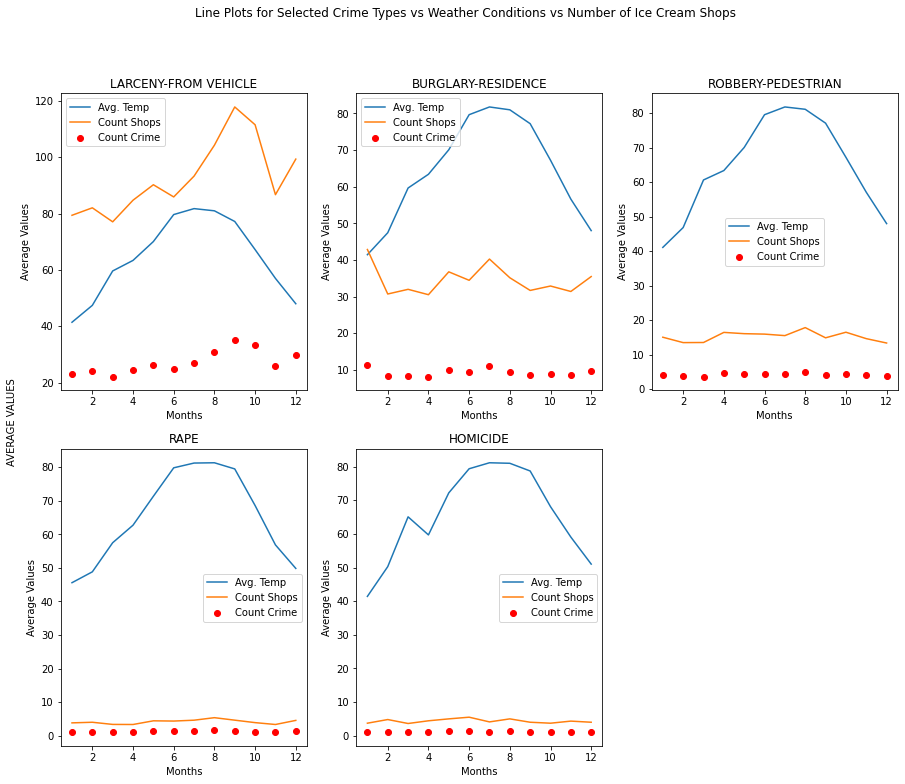

In [35]:
#Line plots for each type of crime vs Avg Temperature vs Number of Ice Cream Shops
fig,ax = plt.subplots(2,3, figsize=(15,12))
fig.suptitle('Line Plots for Selected Crime Types vs Weather Conditions vs Number of Ice Cream Shops')

#1. LARCENY-FROM VEHICLE
data = g1w.groupby('Month').mean()
data.reset_index(inplace=True)
ax[0][0].plot(data['Month'],data['Avg_Temp'], label='Avg. Temp')
ax[0][0].plot(data['Month'],data['Ice Cream Shop'], label='Count Shops')
ax[0][0].scatter(data['Month'],data['Crime Count'], label='Count Crime', c='r')
ax[0][0].title.set_text('LARCENY-FROM VEHICLE')
ax[0][0].set_xlabel('Months')
ax[0][0].set_ylabel('Average Values')
ax[0][0].legend()

#2. BURGLARY-RESIDENCE
data = g2w.groupby('Month').mean()
data.reset_index(inplace=True)
ax[0][1].plot(data['Month'],data['Avg_Temp'], label='Avg. Temp')
ax[0][1].plot(data['Month'],data['Ice Cream Shop'], label='Count Shops')
ax[0][1].scatter(data['Month'],data['Crime Count'], label='Count Crime', c='r')
ax[0][1].title.set_text('BURGLARY-RESIDENCE')
ax[0][1].set_xlabel('Months')
ax[0][1].set_ylabel('Average Values')
ax[0][1].legend()

#3. ROBBERY-PEDESTRIAN
data = g3w.groupby('Month').mean()
data.reset_index(inplace=True)
ax[0][2].plot(data['Month'],data['Avg_Temp'], label='Avg. Temp')
ax[0][2].plot(data['Month'],data['Ice Cream Shop'], label='Count Shops')
ax[0][2].scatter(data['Month'],data['Crime Count'], label='Count Crime', c='r')
ax[0][2].title.set_text('ROBBERY-PEDESTRIAN')
ax[0][2].set_xlabel('Months')
ax[0][2].set_ylabel('Average Values')
ax[0][2].legend()

#4. RAPE
data = g4w.groupby('Month').mean()
data.reset_index(inplace=True)
ax[1][0].plot(data['Month'],data['Avg_Temp'], label='Avg. Temp')
ax[1][0].plot(data['Month'],data['Ice Cream Shop'], label='Count Shops')
ax[1][0].scatter(data['Month'],data['Crime Count'], label='Count Crime', c='r')
ax[1][0].title.set_text('RAPE')
ax[1][0].set_xlabel('Months')
ax[1][0].set_ylabel('Average Values')
ax[1][0].legend()

#5. HOMICIDE
data = g5w.groupby('Month').mean()
data.reset_index(inplace=True)
ax[1][1].plot(data['Month'],data['Avg_Temp'], label='Avg. Temp')
ax[1][1].plot(data['Month'],data['Ice Cream Shop'], label='Count Shops')
ax[1][1].scatter(data['Month'],data['Crime Count'], label='Count Crime', c='r')
ax[1][1].title.set_text('HOMICIDE')
ax[1][1].set_xlabel('Months')
ax[1][1].set_ylabel('Average Values')
ax[1][1].legend()

ax[1][2].set_visible(False)
fig.text(0.08, 0.5, 'AVERAGE VALUES', ha='center', va='center', rotation ='vertical')
plt.show()

# Section 5: Data Analysis

The correlation coeficient r for AVG TEMPERATURE is: 0.20439135971915107
The correlation coeficient r for HUMIDITY is: 0.10856448913289055
The correlation coeficient r for PRECIPITATION is: -0.06356737172401244
The correlation coeficient r for WIND SPEED is: -0.12476937685579438
The correlation coeficient r for ICE CREAM SHOP COUNT is: 0.9879565079649375


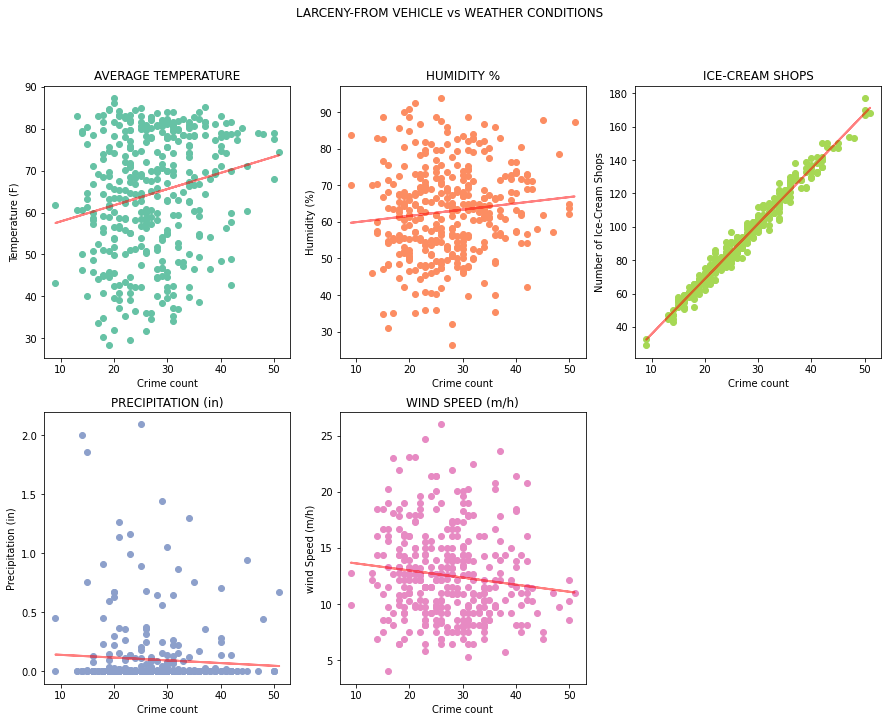

In [38]:
#Distribution Plots Based on Type of Crime and Weather Variable
#LARCENY-FROM VEHICLE
fig,ax = plt.subplots(2,3, figsize=(15,11))
fig.suptitle('LARCENY-FROM VEHICLE vs WEATHER CONDITIONS')

#AVERAGE TEMPERATURE
#Calculation of Regression Line
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g1w['Crime Count'],g1w['Avg_Temp'])
regress_line = g1w['Crime Count']*slope + intercept
ax[0][0].scatter(g1w['Crime Count'], g1w['Avg_Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][0].plot(g1w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][0].title.set_text('AVERAGE TEMPERATURE')
ax[0][0].set_ylabel('Temperature (F)')
ax[0][0].set_xlabel('Crime count')
print("The correlation coeficient r for AVG TEMPERATURE is: "+str(sts.pearsonr(g1w['Crime Count'],g1w['Avg_Temp'])[0]))

#HUMIDITY
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g1w['Crime Count'],g1w['Humidity'])
regress_line = g1w['Crime Count']*slope + intercept
ax[0][1].scatter(g1w['Crime Count'], g1w['Humidity'] ,color= plt.get_cmap('Set2').colors[1])
ax[0][1].plot(g1w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][1].title.set_text('HUMIDITY %')
ax[0][1].set_ylabel('Humidity (%)')
ax[0][1].set_xlabel('Crime count')
print("The correlation coeficient r for HUMIDITY is: "+str(sts.pearsonr(g1w['Crime Count'],g1w['Humidity'])[0]))

#PRECIPITATION
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g1w['Crime Count'],g1w['Precip'])
regress_line = g1w['Crime Count']*slope + intercept
ax[1][0].scatter(g1w['Crime Count'], g1w['Precip'] ,color= plt.get_cmap('Set2').colors[2])
ax[1][0].plot(g1w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][0].title.set_text('PRECIPITATION (in)')
ax[1][0].set_ylabel('Precipitation (in)')
ax[1][0].set_xlabel('Crime count')
print("The correlation coeficient r for PRECIPITATION is: "+str(sts.pearsonr(g1w['Crime Count'],g1w['Precip'])[0]))

#WIND SPEED
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g1w['Crime Count'],g1w['Wind_Speed'])
regress_line = g1w['Crime Count']*slope + intercept
ax[1][1].scatter(g1w['Crime Count'], g1w['Wind_Speed'] ,color= plt.get_cmap('Set2').colors[3])
ax[1][1].plot(g1w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][1].title.set_text('WIND SPEED (m/h)')
ax[1][1].set_ylabel('wind Speed (m/h)')
ax[1][1].set_xlabel('Crime count')
print("The correlation coeficient r for WIND SPEED is: "+str(sts.pearsonr(g1w['Crime Count'],g1w['Wind_Speed'])[0]))

#ICE-CREAM SHOPS
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g1w['Crime Count'],g1w['Ice Cream Shop'])
regress_line = g1w['Crime Count']*slope + intercept
ax[0][2].scatter(g1w['Crime Count'], g1w['Ice Cream Shop'] ,color= plt.get_cmap('Set2').colors[4])
ax[0][2].plot(g1w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][2].title.set_text('ICE-CREAM SHOPS')
ax[0][2].set_ylabel('Number of Ice-Cream Shops')
ax[0][2].set_xlabel('Crime count')
print("The correlation coeficient r for ICE CREAM SHOP COUNT is: "+str(sts.pearsonr(g1w['Crime Count'],g1w['Ice Cream Shop'])[0]))

ax[1][2].set_visible(False)
plt.show()

The correlation coeficient r for AVG TEMPERATURE is: 0.04180419103199778
The correlation coeficient r for HUMIDITY is: 0.119888679319833
The correlation coeficient r for PRECIPITATION is: 0.036252148106392226
The correlation coeficient r for WIND SPEED is: -0.06314055488971843
The correlation coeficient r for ICE CREAM SHOP COUNT is: 0.9836234994852047


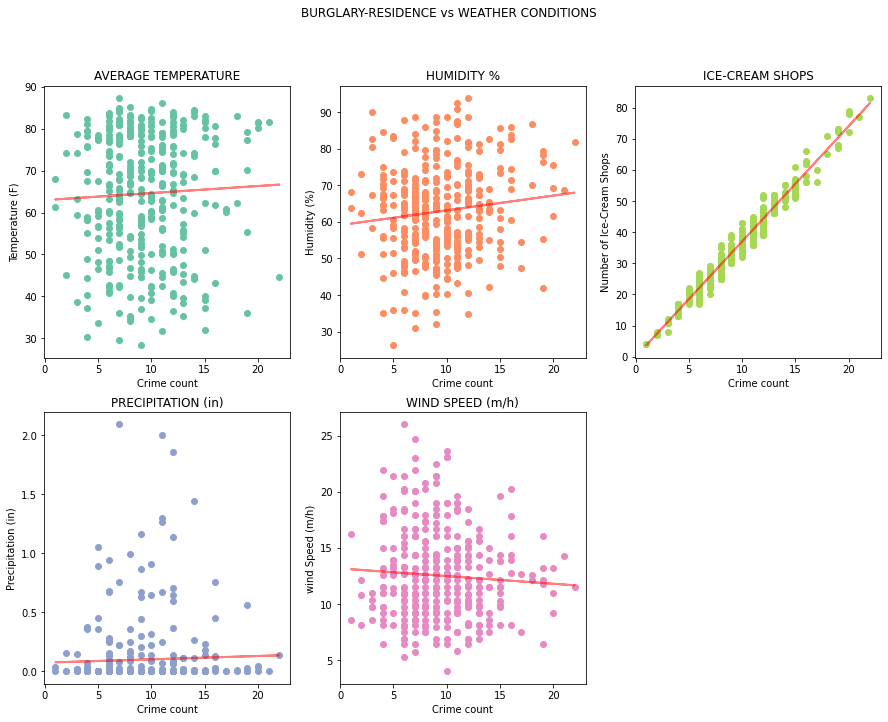

In [41]:
#Distribution Plots Based on Type of Crime and Weather Variable
#BURGLARY-RESIDENCE
fig,ax = plt.subplots(2,3, figsize=(15,11))
fig.suptitle('BURGLARY-RESIDENCE vs WEATHER CONDITIONS')

#AVERAGE TEMPERATURE
#Calculation of Regression Line
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g2w['Crime Count'],g2w['Avg_Temp'])
regress_line = g2w['Crime Count']*slope + intercept
ax[0][0].scatter(g2w['Crime Count'], g2w['Avg_Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][0].plot(g2w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][0].title.set_text('AVERAGE TEMPERATURE')
ax[0][0].set_ylabel('Temperature (F)')
ax[0][0].set_xlabel('Crime count')
print("The correlation coeficient r for AVG TEMPERATURE is: "+str(sts.pearsonr(g2w['Crime Count'],g2w['Avg_Temp'])[0]))

#HUMIDITY
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g2w['Crime Count'],g2w['Humidity'])
regress_line = g2w['Crime Count']*slope + intercept
ax[0][1].scatter(g2w['Crime Count'], g2w['Humidity'] ,color= plt.get_cmap('Set2').colors[1])
ax[0][1].plot(g2w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][1].title.set_text('HUMIDITY %')
ax[0][1].set_ylabel('Humidity (%)')
ax[0][1].set_xlabel('Crime count')
print("The correlation coeficient r for HUMIDITY is: "+str(sts.pearsonr(g2w['Crime Count'],g2w['Humidity'])[0]))

#PRECIPITATION
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g2w['Crime Count'],g2w['Precip'])
regress_line = g2w['Crime Count']*slope + intercept
ax[1][0].scatter(g2w['Crime Count'], g2w['Precip'] ,color= plt.get_cmap('Set2').colors[2])
ax[1][0].plot(g2w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][0].title.set_text('PRECIPITATION (in)')
ax[1][0].set_ylabel('Precipitation (in)')
ax[1][0].set_xlabel('Crime count')
print("The correlation coeficient r for PRECIPITATION is: "+str(sts.pearsonr(g2w['Crime Count'],g2w['Precip'])[0]))

#WIND SPEED
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g2w['Crime Count'],g2w['Wind_Speed'])
regress_line = g2w['Crime Count']*slope + intercept
ax[1][1].scatter(g2w['Crime Count'], g2w['Wind_Speed'] ,color= plt.get_cmap('Set2').colors[3])
ax[1][1].plot(g2w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][1].title.set_text('WIND SPEED (m/h)')
ax[1][1].set_ylabel('wind Speed (m/h)')
ax[1][1].set_xlabel('Crime count')
print("The correlation coeficient r for WIND SPEED is: "+str(sts.pearsonr(g2w['Crime Count'],g2w['Wind_Speed'])[0]))

#ICE-CREAM SHOPS
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g2w['Crime Count'],g2w['Ice Cream Shop'])
regress_line = g2w['Crime Count']*slope + intercept
ax[0][2].scatter(g2w['Crime Count'], g2w['Ice Cream Shop'] ,color= plt.get_cmap('Set2').colors[4])
ax[0][2].plot(g2w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][2].title.set_text('ICE-CREAM SHOPS')
ax[0][2].set_ylabel('Number of Ice-Cream Shops')
ax[0][2].set_xlabel('Crime count')
print("The correlation coeficient r for ICE CREAM SHOP COUNT is: "+str(sts.pearsonr(g2w['Crime Count'],g2w['Ice Cream Shop'])[0]))

ax[1][2].set_visible(False)
plt.show()

The correlation coeficient r for AVG TEMPERATURE is: 0.0871967985352302
The correlation coeficient r for HUMIDITY is: 0.018694613290437898
The correlation coeficient r for PRECIPITATION is: -0.026247656001690524
The correlation coeficient r for WIND SPEED is: -0.04230175889243663
The correlation coeficient r for ICE CREAM SHOP COUNT is: 0.9829109953922452


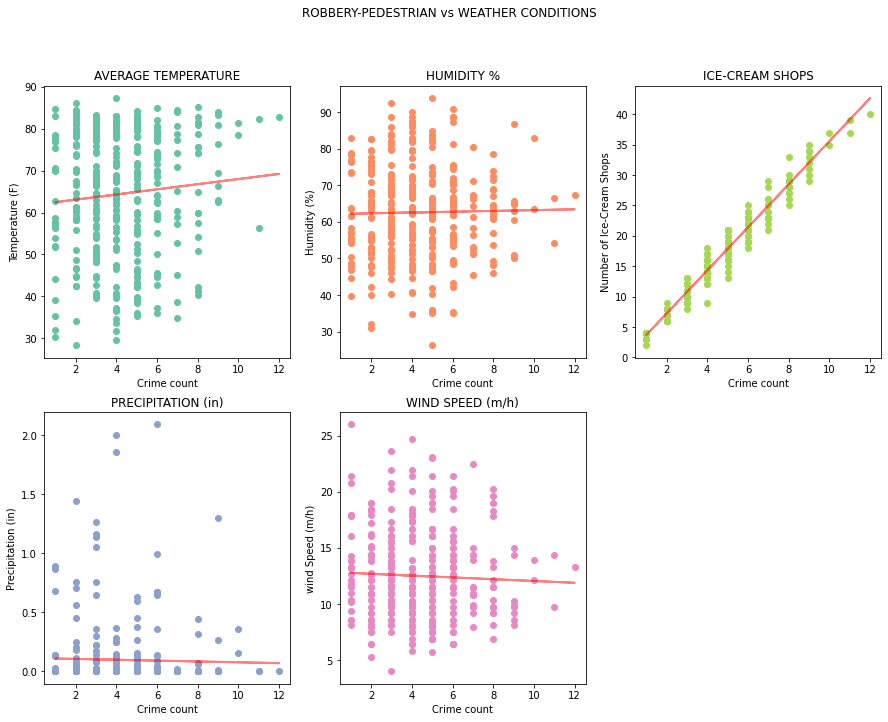

In [43]:
#Distribution Plots Based on Type of Crime and Weather Variable
#ROBBERY-PEDESTRIAN
fig,ax = plt.subplots(2,3, figsize=(15,11))
fig.suptitle('ROBBERY-PEDESTRIAN vs WEATHER CONDITIONS')

#AVERAGE TEMPERATURE
#Calculation of Regression Line
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g3w['Crime Count'],g3w['Avg_Temp'])
regress_line = g3w['Crime Count']*slope + intercept
ax[0][0].scatter(g3w['Crime Count'], g3w['Avg_Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][0].plot(g3w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][0].title.set_text('AVERAGE TEMPERATURE')
ax[0][0].set_ylabel('Temperature (F)')
ax[0][0].set_xlabel('Crime count')
print("The correlation coeficient r for AVG TEMPERATURE is: "+str(sts.pearsonr(g3w['Crime Count'],g3w['Avg_Temp'])[0]))

#HUMIDITY
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g3w['Crime Count'],g3w['Humidity'])
regress_line = g3w['Crime Count']*slope + intercept
ax[0][1].scatter(g3w['Crime Count'], g3w['Humidity'] ,color= plt.get_cmap('Set2').colors[1])
ax[0][1].plot(g3w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][1].title.set_text('HUMIDITY %')
ax[0][1].set_ylabel('Humidity (%)')
ax[0][1].set_xlabel('Crime count')
print("The correlation coeficient r for HUMIDITY is: "+str(sts.pearsonr(g3w['Crime Count'],g3w['Humidity'])[0]))

#PRECIPITATION
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g3w['Crime Count'],g3w['Precip'])
regress_line = g3w['Crime Count']*slope + intercept
ax[1][0].scatter(g3w['Crime Count'], g3w['Precip'] ,color= plt.get_cmap('Set2').colors[2])
ax[1][0].plot(g3w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][0].title.set_text('PRECIPITATION (in)')
ax[1][0].set_ylabel('Precipitation (in)')
ax[1][0].set_xlabel('Crime count')
print("The correlation coeficient r for PRECIPITATION is: "+str(sts.pearsonr(g3w['Crime Count'],g3w['Precip'])[0]))

#WIND SPEED
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g3w['Crime Count'],g3w['Wind_Speed'])
regress_line = g3w['Crime Count']*slope + intercept
ax[1][1].scatter(g3w['Crime Count'], g3w['Wind_Speed'] ,color= plt.get_cmap('Set2').colors[3])
ax[1][1].plot(g3w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][1].title.set_text('WIND SPEED (m/h)')
ax[1][1].set_ylabel('wind Speed (m/h)')
ax[1][1].set_xlabel('Crime count')
print("The correlation coeficient r for WIND SPEED is: "+str(sts.pearsonr(g3w['Crime Count'],g3w['Wind_Speed'])[0]))

#ICE-CREAM SHOPS
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g3w['Crime Count'],g3w['Ice Cream Shop'])
regress_line = g3w['Crime Count']*slope + intercept
ax[0][2].scatter(g3w['Crime Count'], g3w['Ice Cream Shop'] ,color= plt.get_cmap('Set2').colors[4])
ax[0][2].plot(g3w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][2].title.set_text('ICE-CREAM SHOPS')
ax[0][2].set_ylabel('Number of Ice-Cream Shops')
ax[0][2].set_xlabel('Crime count')
print("The correlation coeficient r for ICE CREAM SHOP COUNT is: "+str(sts.pearsonr(g3w['Crime Count'],g3w['Ice Cream Shop'])[0]))

ax[1][2].set_visible(False)
plt.show()

The correlation coeficient r for AVG TEMPERATURE is: 0.15052052191487442
The correlation coeficient r for HUMIDITY is: 0.148472602636119
The correlation coeficient r for PRECIPITATION is: -0.015206842744742328
The correlation coeficient r for WIND SPEED is: -0.13700820881894288
The correlation coeficient r for ICE CREAM SHOP COUNT is: 0.9337277324783947


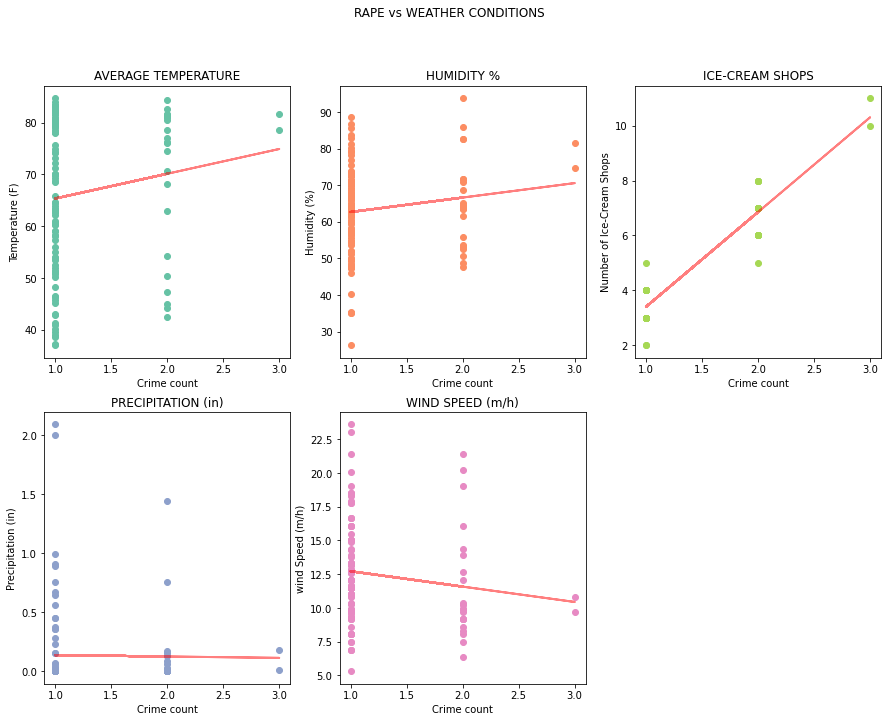

In [44]:
#Distribution Plots Based on Type of Crime and Weather Variable
#RAPE
fig,ax = plt.subplots(2,3, figsize=(15,11))
fig.suptitle('RAPE vs WEATHER CONDITIONS')

#AVERAGE TEMPERATURE
#Calculation of Regression Line
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g4w['Crime Count'],g4w['Avg_Temp'])
regress_line = g4w['Crime Count']*slope + intercept
ax[0][0].scatter(g4w['Crime Count'], g4w['Avg_Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][0].plot(g4w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][0].title.set_text('AVERAGE TEMPERATURE')
ax[0][0].set_ylabel('Temperature (F)')
ax[0][0].set_xlabel('Crime count')
print("The correlation coeficient r for AVG TEMPERATURE is: "+str(sts.pearsonr(g4w['Crime Count'],g4w['Avg_Temp'])[0]))

#HUMIDITY
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g4w['Crime Count'],g4w['Humidity'])
regress_line = g4w['Crime Count']*slope + intercept
ax[0][1].scatter(g4w['Crime Count'], g4w['Humidity'] ,color= plt.get_cmap('Set2').colors[1])
ax[0][1].plot(g4w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][1].title.set_text('HUMIDITY %')
ax[0][1].set_ylabel('Humidity (%)')
ax[0][1].set_xlabel('Crime count')
print("The correlation coeficient r for HUMIDITY is: "+str(sts.pearsonr(g4w['Crime Count'],g4w['Humidity'])[0]))

#PRECIPITATION
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g4w['Crime Count'],g4w['Precip'])
regress_line = g4w['Crime Count']*slope + intercept
ax[1][0].scatter(g4w['Crime Count'], g4w['Precip'] ,color= plt.get_cmap('Set2').colors[2])
ax[1][0].plot(g4w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][0].title.set_text('PRECIPITATION (in)')
ax[1][0].set_ylabel('Precipitation (in)')
ax[1][0].set_xlabel('Crime count')
print("The correlation coeficient r for PRECIPITATION is: "+str(sts.pearsonr(g4w['Crime Count'],g4w['Precip'])[0]))

#WIND SPEED
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g4w['Crime Count'],g4w['Wind_Speed'])
regress_line = g4w['Crime Count']*slope + intercept
ax[1][1].scatter(g4w['Crime Count'], g4w['Wind_Speed'] ,color= plt.get_cmap('Set2').colors[3])
ax[1][1].plot(g4w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][1].title.set_text('WIND SPEED (m/h)')
ax[1][1].set_ylabel('wind Speed (m/h)')
ax[1][1].set_xlabel('Crime count')
print("The correlation coeficient r for WIND SPEED is: "+str(sts.pearsonr(g4w['Crime Count'],g4w['Wind_Speed'])[0]))

#ICE-CREAM SHOPS
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g4w['Crime Count'],g4w['Ice Cream Shop'])
regress_line = g4w['Crime Count']*slope + intercept
ax[0][2].scatter(g4w['Crime Count'], g4w['Ice Cream Shop'] ,color= plt.get_cmap('Set2').colors[4])
ax[0][2].plot(g4w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][2].title.set_text('ICE-CREAM SHOPS')
ax[0][2].set_ylabel('Number of Ice-Cream Shops')
ax[0][2].set_xlabel('Crime count')
print("The correlation coeficient r for ICE CREAM SHOP COUNT is: "+str(sts.pearsonr(g4w['Crime Count'],g4w['Ice Cream Shop'])[0]))

ax[1][2].set_visible(False)
plt.show()

The correlation coeficient r for AVG TEMPERATURE is: 0.19639006738068288
The correlation coeficient r for HUMIDITY is: 0.028836752093933736
The correlation coeficient r for PRECIPITATION is: -0.03582964884797882
The correlation coeficient r for WIND SPEED is: -0.02976183502300058
The correlation coeficient r for ICE CREAM SHOP COUNT is: 0.949585294917906


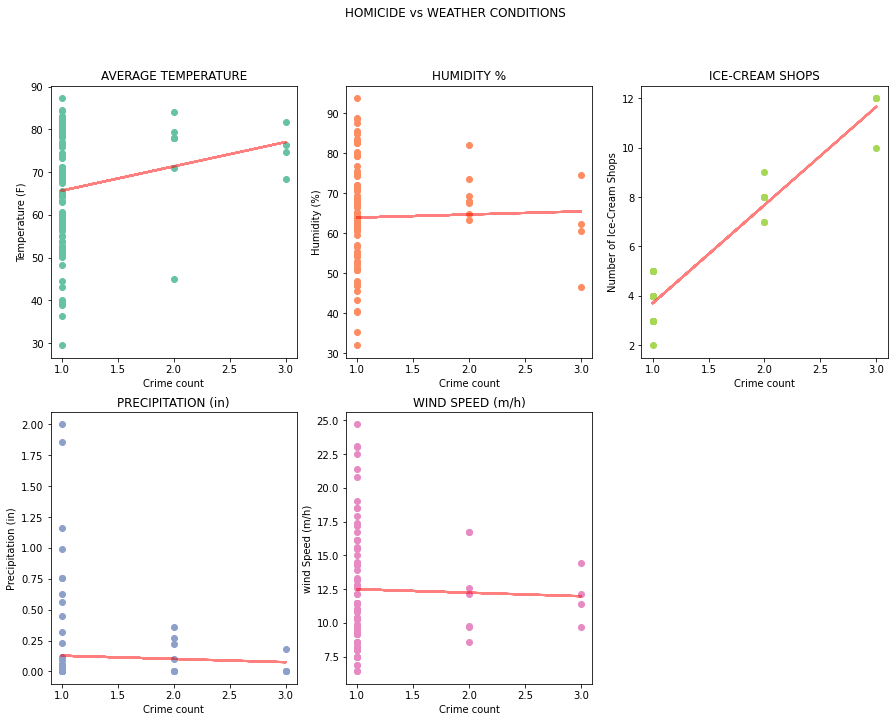

In [45]:
#Distribution Plots Based on Type of Crime and Weather Variable
#HOMICIDE
fig,ax = plt.subplots(2,3, figsize=(15,11))
fig.suptitle('HOMICIDE vs WEATHER CONDITIONS')

#AVERAGE TEMPERATURE
#Calculation of Regression Line
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g5w['Crime Count'],g5w['Avg_Temp'])
regress_line = g5w['Crime Count']*slope + intercept
ax[0][0].scatter(g5w['Crime Count'], g5w['Avg_Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][0].plot(g5w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][0].title.set_text('AVERAGE TEMPERATURE')
ax[0][0].set_ylabel('Temperature (F)')
ax[0][0].set_xlabel('Crime count')
print("The correlation coeficient r for AVG TEMPERATURE is: "+str(sts.pearsonr(g5w['Crime Count'],g5w['Avg_Temp'])[0]))

#HUMIDITY
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g5w['Crime Count'],g5w['Humidity'])
regress_line = g5w['Crime Count']*slope + intercept
ax[0][1].scatter(g5w['Crime Count'], g5w['Humidity'] ,color= plt.get_cmap('Set2').colors[1])
ax[0][1].plot(g5w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][1].title.set_text('HUMIDITY %')
ax[0][1].set_ylabel('Humidity (%)')
ax[0][1].set_xlabel('Crime count')
print("The correlation coeficient r for HUMIDITY is: "+str(sts.pearsonr(g5w['Crime Count'],g5w['Humidity'])[0]))

#PRECIPITATION
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g5w['Crime Count'],g5w['Precip'])
regress_line = g5w['Crime Count']*slope + intercept
ax[1][0].scatter(g5w['Crime Count'], g5w['Precip'] ,color= plt.get_cmap('Set2').colors[2])
ax[1][0].plot(g5w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][0].title.set_text('PRECIPITATION (in)')
ax[1][0].set_ylabel('Precipitation (in)')
ax[1][0].set_xlabel('Crime count')
print("The correlation coeficient r for PRECIPITATION is: "+str(sts.pearsonr(g5w['Crime Count'],g5w['Precip'])[0]))

#WIND SPEED
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g5w['Crime Count'],g5w['Wind_Speed'])
regress_line = g5w['Crime Count']*slope + intercept
ax[1][1].scatter(g5w['Crime Count'], g5w['Wind_Speed'] ,color= plt.get_cmap('Set2').colors[3])
ax[1][1].plot(g5w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][1].title.set_text('WIND SPEED (m/h)')
ax[1][1].set_ylabel('wind Speed (m/h)')
ax[1][1].set_xlabel('Crime count')
print("The correlation coeficient r for WIND SPEED is: "+str(sts.pearsonr(g5w['Crime Count'],g5w['Wind_Speed'])[0]))

#ICE-CREAM SHOPS
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(g5w['Crime Count'],g5w['Ice Cream Shop'])
regress_line = g5w['Crime Count']*slope + intercept
ax[0][2].scatter(g5w['Crime Count'], g5w['Ice Cream Shop'] ,color= plt.get_cmap('Set2').colors[4])
ax[0][2].plot(g5w['Crime Count'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][2].title.set_text('ICE-CREAM SHOPS')
ax[0][2].set_ylabel('Number of Ice-Cream Shops')
ax[0][2].set_xlabel('Crime count')
print("The correlation coeficient r for ICE CREAM SHOP COUNT is: "+str(sts.pearsonr(g5w['Crime Count'],g5w['Ice Cream Shop'])[0]))

ax[1][2].set_visible(False)
plt.show()

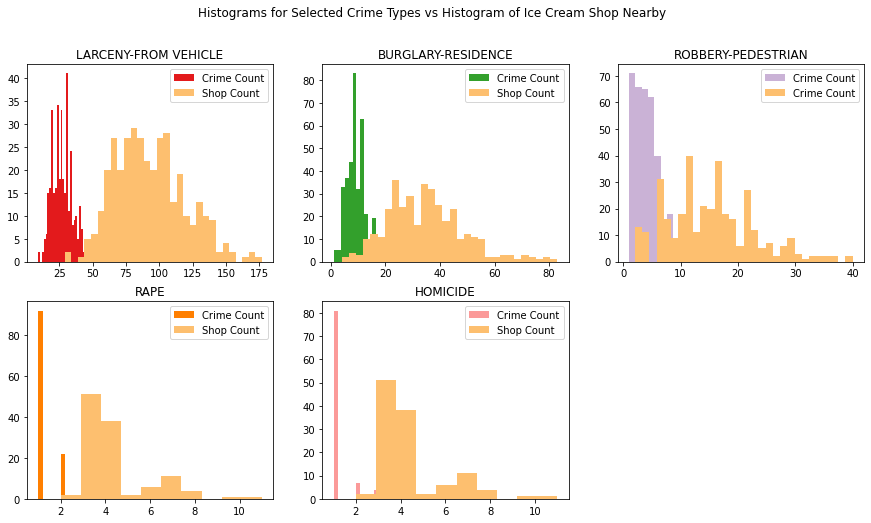

In [57]:
#Histograms of Number of Crimes and Count of Ice-Cream Shops
fig,ax = plt.subplots(2,3, figsize=(15,8))
fig.suptitle('Histograms for Selected Crime Types vs Histogram of Ice Cream Shop Nearby')

#1. LARCENY-FROM VEHICLE
ax[0][0].hist(g1w['Crime Count'],bins=30, color= plt.get_cmap('Paired').colors[5], label = 'Crime Count')
ax[0][0].hist(g1w['Ice Cream Shop'],bins=30, color= plt.get_cmap('Paired').colors[6], label = 'Shop Count')
ax[0][0].title.set_text('LARCENY-FROM VEHICLE')
ax[0][0].legend()

#2. BURGLARY-RESIDENCE
ax[0][1].hist(g2w['Crime Count'],bins=15, color= plt.get_cmap('Paired').colors[3], label = 'Crime Count')
ax[0][1].hist(g2w['Ice Cream Shop'],bins=30, color= plt.get_cmap('Paired').colors[6], label = 'Shop Count')
ax[0][1].title.set_text('BURGLARY-RESIDENCE')
ax[0][1].legend()

#3. ROBBERY-PEDESTRIAN
ax[0][2].hist(g3w['Crime Count'],bins=10, color= plt.get_cmap('Paired').colors[8], label = 'Crime Count')
ax[0][2].hist(g3w['Ice Cream Shop'],bins=30, color= plt.get_cmap('Paired').colors[6], label = 'Crime Count')
ax[0][2].title.set_text('ROBBERY-PEDESTRIAN')
ax[0][2].legend()

#4. RAPE
ax[1][0].hist(g4w['Crime Count'], color= plt.get_cmap('Paired').colors[7], label = 'Crime Count')
ax[1][0].hist(g4w['Ice Cream Shop'],color= plt.get_cmap('Paired').colors[6], label = 'Shop Count')
ax[1][0].title.set_text('RAPE')
ax[1][0].legend()

#5. HOMICIDE
ax[1][1].hist(g5w['Crime Count'], color= plt.get_cmap('Paired').colors[4], label = 'Crime Count')
ax[1][1].hist(g4w['Ice Cream Shop'],color= plt.get_cmap('Paired').colors[6], label = 'Shop Count')
ax[1][1].title.set_text('HOMICIDE')
ax[1][1].legend()

ax[1][2].set_visible(False)
plt.show()


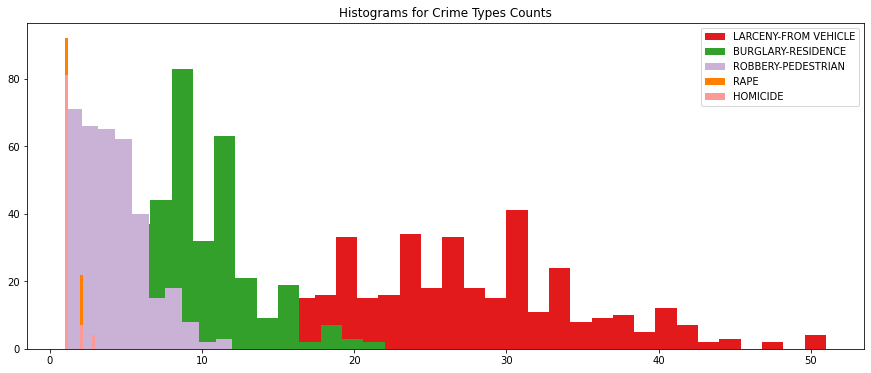

In [62]:
#Histograms of Number of Crimes Types

plt.figure(figsize=(15,6))
#1. LARCENY-FROM VEHICLE
plt.hist(g1w['Crime Count'],bins=30, color= plt.get_cmap('Paired').colors[5], label = 'LARCENY-FROM VEHICLE')
#2. BURGLARY-RESIDENCE
plt.hist(g2w['Crime Count'],bins=15, color= plt.get_cmap('Paired').colors[3], label = 'BURGLARY-RESIDENCE')
#3. ROBBERY-PEDESTRIAN
plt.hist(g3w['Crime Count'],bins=10, color= plt.get_cmap('Paired').colors[8], label = 'ROBBERY-PEDESTRIAN')
#4. RAPE
plt.hist(g4w['Crime Count'], color= plt.get_cmap('Paired').colors[7], label = 'RAPE')
#5. HOMICIDE
plt.hist(g5w['Crime Count'], color= plt.get_cmap('Paired').colors[4], label = 'HOMICIDE')
plt.title('Histograms for Crime Types Counts')
plt.legend()
plt.show()